# CS 1656 – Introduction to Data Science 

## Instructor: Alexandros Labrinidis
### Teaching Assistant: Evangelos Karageorgos
### Additional credits: Phuong Pham, Zuha Agha, Anatoli Shein
## Recitation 7: Networks in Python
---

This recitation focuses on managing and querying graphs. We will use material from https://networkx.github.io/documentation/stable/tutorial.html 

In [1]:
import networkx as nx

Let's first create a simple unidirectional graph

In [2]:
G = nx.Graph()

Let's add two nodes, labeled 4 and 8

In [3]:
G.add_node(4)
G.add_node(8)

Let's add an edge connecting these two nodes

In [4]:
G.add_edge(4,8)

Let's see what we have done.

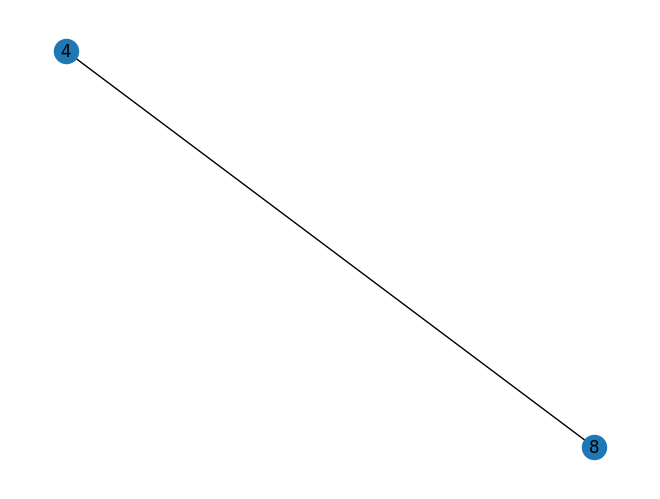

In [5]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

We can also add nodes and edges in bulk

In [6]:
mynodes = [1,2,3,4,5,6,7,8]
myedges = [(1,2),(3,4),(5,6),(7,8), (4,8)]
G.add_nodes_from(mynodes)
G.add_edges_from(myedges)

Let's see what we have.

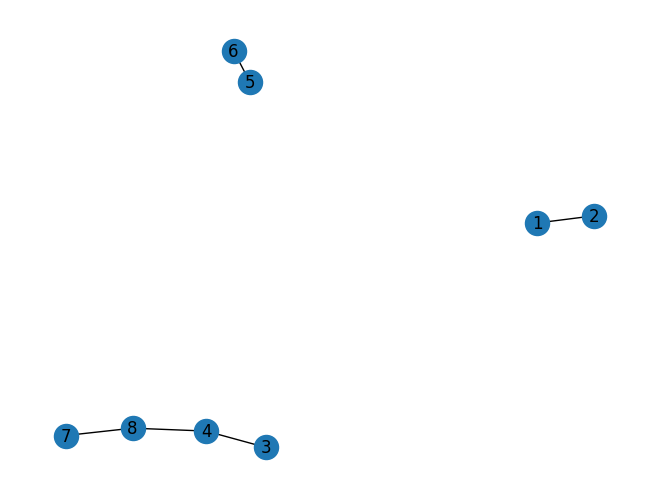

In [7]:
nx.draw(G, with_labels=True)
plt.show()

Some simple statistics on our graph

In [8]:
print ("Number of nodes:",G.number_of_nodes())
print ("Number of edges:",G.number_of_edges())


Number of nodes: 8
Number of edges: 5


Let's see a list of all the nodes and of all the edges.

In [9]:
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))

Nodes: [4, 8, 1, 2, 3, 5, 6, 7]
Edges: [(4, 8), (4, 3), (8, 7), (1, 2), (5, 6)]


We can also get the lists of edges from a specific node or specific nodes.

In [10]:
print("Edges in/out of node 4:", list(G.edges(4)))

Edges in/out of node 4: [(4, 8), (4, 3)]


In [11]:
print("Edges in/out of nodes 4 and 5:", list(G.edges([4,5])))

Edges in/out of nodes 4 and 5: [(4, 8), (4, 3), (5, 6)]


Let's add a few more edges, to make it more interesting.

In [12]:
myedges2 = [(1,3),(1,4),(2,5),(2,6),(2,7),(2,8)]
G.add_edges_from(myedges2)

In [13]:
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))

Nodes: [4, 8, 1, 2, 3, 5, 6, 7]
Edges: [(4, 8), (4, 3), (4, 1), (8, 7), (8, 2), (1, 2), (1, 3), (2, 5), (2, 6), (2, 7), (5, 6)]


In [14]:
print("Nodes adjacent to node 1:", list(G.adj[1]))

Nodes adjacent to node 1: [2, 3, 4]


In [15]:
print("Nodes neighboring to node 1:", list(G.neighbors(1)))  # Same as .adj[]

Nodes neighboring to node 1: [2, 3, 4]


In [16]:
print("Degree of node 1:", G.degree(1))

Degree of node 1: 3


In [17]:
print("Degree of nodes 1,2:", G.degree([1,2]))

Degree of nodes 1,2: [(1, 3), (2, 5)]


Add an attribute to every node in the graph.

In [18]:
for i in list(G.nodes()):
    print ("Node:",i)
    G.nodes[i]['color'] = 'Blue'
    print ("Node:",G.nodes[i])

Node: 4
Node: {'color': 'Blue'}
Node: 8
Node: {'color': 'Blue'}
Node: 1
Node: {'color': 'Blue'}
Node: 2
Node: {'color': 'Blue'}
Node: 3
Node: {'color': 'Blue'}
Node: 5
Node: {'color': 'Blue'}
Node: 6
Node: {'color': 'Blue'}
Node: 7
Node: {'color': 'Blue'}


Let's now create a directed graph.

In [19]:
DG = nx.DiGraph()
newnodes = (1,2,3,4,5,6)
newedges = [(1,2),(2,3),(3,4),(4,3),(4,5),(5,6),(4,6),(3,6),(6,2)]
DG.add_nodes_from(newnodes)
DG.add_edges_from(newedges)
print("Nodes:", list(DG.nodes()))
print("Edges:", list(DG.edges()))

Nodes: [1, 2, 3, 4, 5, 6]
Edges: [(1, 2), (2, 3), (3, 4), (3, 6), (4, 3), (4, 5), (4, 6), (5, 6), (6, 2)]


Let's print the directed graph. Note the thicker parts at the edges, indicating arrows.

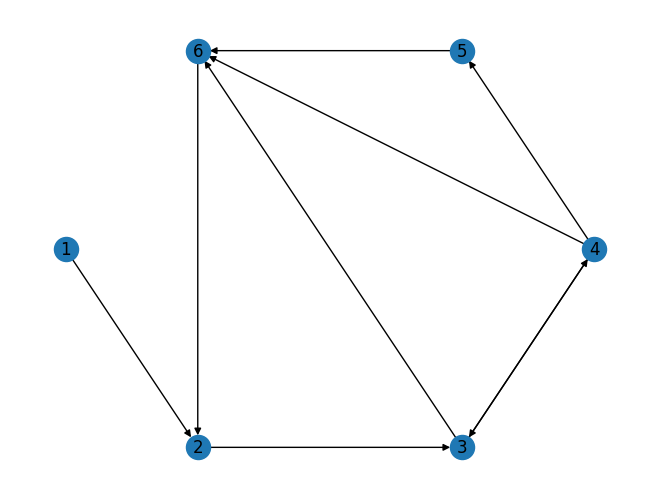

In [20]:
nx.draw_shell(DG, with_labels=True)
plt.show()

Networkx supports many different algorithms, directly on the specified graphs. For more information go to https://networkx.github.io/documentation/stable/reference/algorithms/traversal.html

Let's do a breadth-first traversal of the graph above, starting from node 1.

In [21]:
root = 1
all_edges = nx.bfs_edges(DG,root)  # all edges during breadth-first traversal of graph, starting at root
print ("all_edges:",all_edges)

print ("list(all_edges) #1:", list(all_edges))

print ("list(all_edges) #2:", list(all_edges))

all_edges = nx.bfs_edges(DG,root) # REDO
edgelist = list(all_edges)
print ("Edge List #1:",edgelist)
print ("Edge List #2:",edgelist)

all_edges: <generator object bfs_edges at 0x000002AEB7790970>
list(all_edges) #1: [(1, 2), (2, 3), (3, 4), (3, 6), (4, 5)]
list(all_edges) #2: []
Edge List #1: [(1, 2), (2, 3), (3, 4), (3, 6), (4, 5)]
Edge List #2: [(1, 2), (2, 3), (3, 4), (3, 6), (4, 5)]


In [22]:
print (dict(nx.bfs_successors(DG,root)))

{1: [2], 2: [3], 3: [4, 6], 4: [5]}


## Tasks
You should do the following tasks on your own.

**Task 1**
Given the following code that generates three different graphs (graph1, graph2, graph3), compute the degree for each node and report the highest and the lowest degree over all nodes for each of the graphs. For every graph, print a list of tuples (node, degree_of_node) and a minimum and maximum degree.

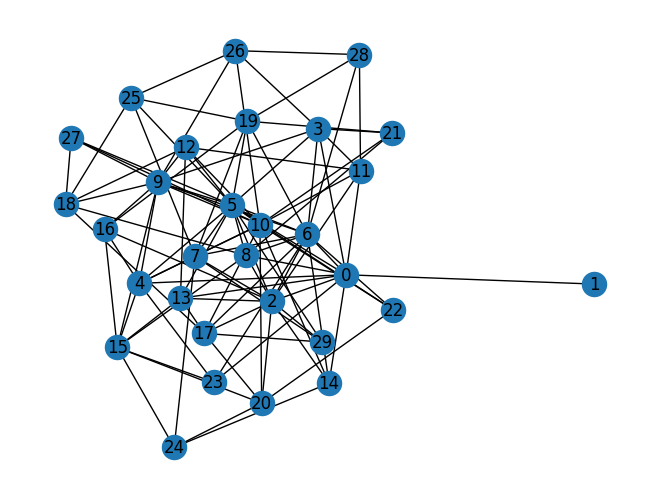

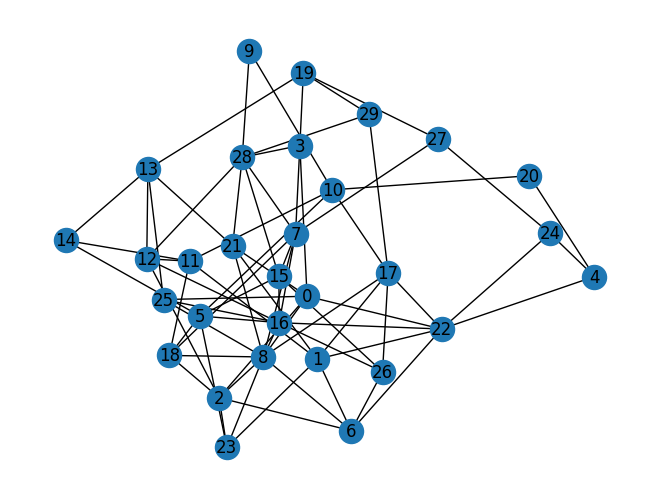

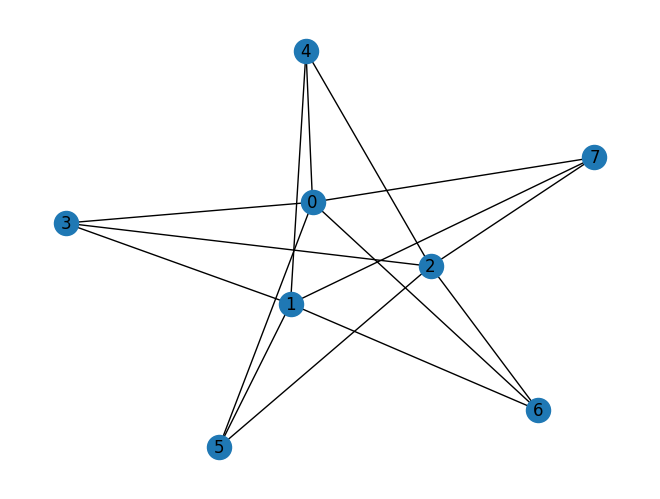

In [23]:
graph1 = nx.barabasi_albert_graph(30, 4)
nx.draw(graph1, with_labels=True)
plt.show()

graph2 = nx.erdos_renyi_graph(30, 0.15)
nx.draw(graph2, with_labels=True)
plt.show()

graph3 = nx.complete_bipartite_graph(3, 5)
nx.draw(graph3, with_labels=True)
plt.show()

Write your code here:

In [24]:
# Compute degree for each node and store as a list of tuples (node, degree)
degrees1 = list(graph1.degree())
degrees2 = list(graph2.degree())
degrees3 = list(graph3.degree())

# Find minimum and maximum degree for each graph
min_degree1 = min(dict(graph1.degree()).values())
max_degree1 = max(dict(graph1.degree()).values())
min_degree2 = min(dict(graph2.degree()).values())
max_degree2 = max(dict(graph2.degree()).values())
min_degree3 = min(dict(graph3.degree()).values())
max_degree3 = max(dict(graph3.degree()).values())

# Print results for each graph
print("Graph 1:")
print("List of tuples (node, degree):", degrees1)
print("Minimum degree:", min_degree1)
print("Maximum degree:", max_degree1)

print("Graph 2:")
print("List of tuples (node, degree):", degrees2)
print("Minimum degree:", min_degree2)
print("Maximum degree:", max_degree2)

print("Graph 3:")
print("List of tuples (node, degree):", degrees3)
print("Minimum degree:", min_degree3)
print("Maximum degree:", max_degree3)

Graph 1:
List of tuples (node, degree): [(0, 11), (1, 1), (2, 12), (3, 7), (4, 8), (5, 16), (6, 13), (7, 9), (8, 7), (9, 11), (10, 13), (11, 6), (12, 6), (13, 6), (14, 5), (15, 8), (16, 5), (17, 7), (18, 6), (19, 7), (20, 6), (21, 4), (22, 4), (23, 4), (24, 4), (25, 5), (26, 5), (27, 4), (28, 4), (29, 4)]
Minimum degree: 1
Maximum degree: 16
Graph 2:
List of tuples (node, degree): [(0, 6), (1, 6), (2, 6), (3, 4), (4, 3), (5, 6), (6, 5), (7, 7), (8, 10), (9, 2), (10, 5), (11, 5), (12, 5), (13, 5), (14, 3), (15, 5), (16, 8), (17, 6), (18, 5), (19, 4), (20, 2), (21, 5), (22, 7), (23, 4), (24, 3), (25, 4), (26, 4), (27, 3), (28, 7), (29, 3)]
Minimum degree: 2
Maximum degree: 10
Graph 3:
List of tuples (node, degree): [(0, 5), (1, 5), (2, 5), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3)]
Minimum degree: 3
Maximum degree: 5


**Task 2**
Create and draw a directional graph with 5 nodes and 10 edges. Make sure to include at least one node that has a single outgoing edge and no incoming edges.

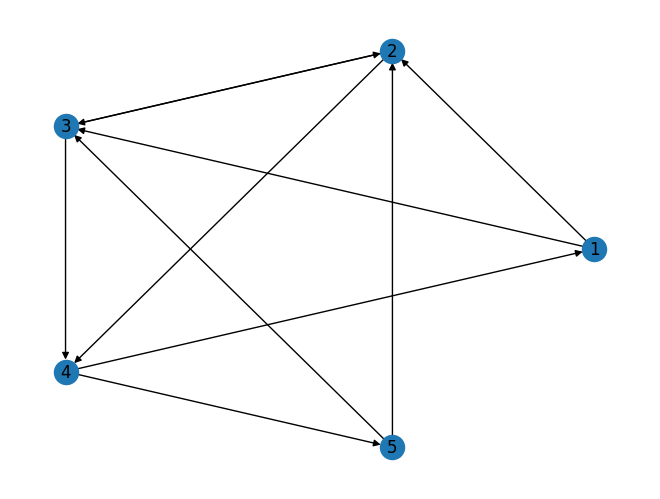

In [25]:
# Create an empty directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_nodes_from([1, 2, 3, 4, 5])

# Add edges to the graph
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(2, 4)
G.add_edge(3, 2)
G.add_edge(3, 4)
G.add_edge(4, 1)
G.add_edge(4, 5)
G.add_edge(5, 2)
G.add_edge(5, 3)

# Set the position of the nodes
pos = nx.circular_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True)

# Show the graph
plt.show()


**Task 3**
For each node in the graph that you generated in task 2, compute what nodes are reachable using a BFS traversal starting at that node. For every node, print a list that includes the node and all reachable nodes for that node. For example, if for node 1, a BFS traversal reaches nodes 5, 3, 2 and 6 in that order, print [1, 5, 3, 2, 6]. Report these for all nodes in the graph, one line per node.

In [26]:
# Iterate over each node in the graph
for node in G.nodes():
    # Compute the reachable nodes using a BFS traversal
    reachable_nodes = list(nx.bfs_successors(G, node))

    # Print the list of reachable nodes for this node
    print([node] + [item for sublist in reachable_nodes for item in sublist])

[1, 1, [2, 3], 2, [4], 4, [5]]
[2, 2, [3, 4], 4, [1, 5]]
[3, 3, [2, 4], 4, [1, 5]]
[4, 4, [1, 5], 1, [2, 3]]
[5, 5, [2, 3], 2, [4], 4, [1]]
